In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime 
import cv2
from PIL import Image
from keras import backend, optimizers
from focal_loss import BinaryFocalLoss

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
image_directory = 'Dataset/Dataset/Train/Images/'
mask_directory = 'Dataset/Dataset/Train/Masks/'

In [4]:
SIZE = 256
image_dataset = []  
mask_dataset = []  

In [5]:
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [6]:
masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [7]:
image_dataset = np.array(image_dataset)/255.
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

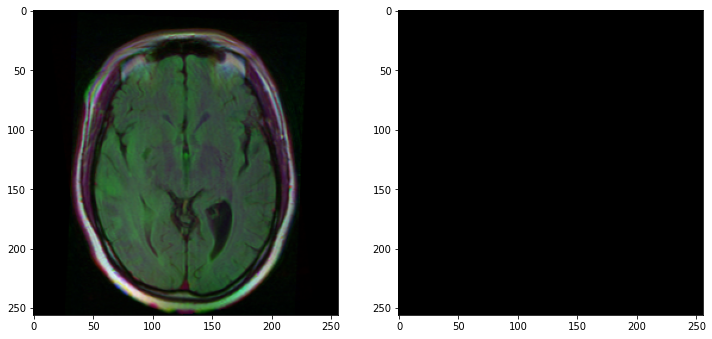

In [9]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [10]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 8

In [11]:
from models import dice_coef, dice_coef_loss, jacard_coef

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

 rmalization)                   )                                                                 
                                                                                                  
 activation_8 (Activation)      (None, 16, 16, 1024  0           ['batch_normalization_8[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 16, 16, 1024  9438208     ['activation_8[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 16, 16, 1024  4096       ['conv2d_9[0][0]']               
 rmalization)                   )                                                                 
          

 conv2d_16 (Conv2D)             (None, 256, 256, 64  110656      ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 256, 256, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_16 (Activation)     (None, 256, 256, 64  0           ['batch_normalization_16[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 256, 256, 64  36928       ['activation_16[0][0]']          
          

In [12]:
# unet_model = UNet(input_shape)
# unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2), 
#               metrics=['accuracy', jacard_coef])


# print(unet_model.summary())

In [13]:
from seunet import SEUNet

In [14]:
seunet_model = SEUNet(input_shape)
seunet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2), 
              metrics=['accuracy', jacard_coef])


print(seunet_model.summary())

Model: "SEUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 256, 256, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                            

 max_pooling2d_6 (MaxPooling2D)  (None, 32, 32, 256)  0          ['tf.math.multiply_1[0][0]']     
                                                                                                  
 conv2d_25 (Conv2D)             (None, 32, 32, 512)  1180160     ['max_pooling2d_6[0][0]']        
                                                                                                  
 batch_normalization_25 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_25 (Activation)     (None, 32, 32, 512)  0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 32, 32, 512)  2359808     ['activation_25[0][0]']          
          

                                                                                                  
 batch_normalization_33 (BatchN  (None, 128, 128, 12  512        ['conv2d_33[0][0]']              
 ormalization)                  8)                                                                
                                                                                                  
 activation_33 (Activation)     (None, 128, 128, 12  0           ['batch_normalization_33[0][0]'] 
                                8)                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 128, 128, 12  147584      ['activation_33[0][0]']          
                                8)                                                                
                                                                                                  
 batch_nor

 activation_21 (Activation)     (None, 128, 128, 12  0           ['batch_normalization_21[0][0]'] 
                                8)                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 128, 128, 12  147584      ['activation_21[0][0]']          
                                8)                                                                
                                                                                                  
 batch_normalization_22 (BatchN  (None, 128, 128, 12  512        ['conv2d_22[0][0]']              
 ormalization)                  8)                                                                
                                                                                                  
 activation_22 (Activation)     (None, 128, 128, 12  0           ['batch_normalization_22[0][0]'] 
          

 activation_28 (Activation)     (None, 16, 16, 1024  0           ['batch_normalization_28[0][0]'] 
                                )                                                                 
                                                                                                  
 up_sampling2d_4 (UpSampling2D)  (None, 32, 32, 1024  0          ['activation_28[0][0]']          
                                )                                                                 
                                                                                                  
 concatenate_4 (Concatenate)    (None, 32, 32, 1536  0           ['up_sampling2d_4[0][0]',        
                                )                                 'activation_26[0][0]']          
                                                                                                  
 conv2d_29 (Conv2D)             (None, 32, 32, 512)  7078400     ['concatenate_4[0][0]']          
          

                                                                                                  
 batch_normalization_36 (BatchN  (None, 256, 256, 64  256        ['conv2d_36[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_36 (Activation)     (None, 256, 256, 64  0           ['batch_normalization_36[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 256, 256, 3)  195         ['activation_36[0][0]']          
                                                                                                  
 batch_normalization_37 (BatchN  (None, 256, 256, 3)  12         ['conv2d_37[0][0]']              
 ormalizat

C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
start1 = datetime.now() 
seunet_history = seunet_model.fit(X_train, y_train, 
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ), 
                    shuffle=False,
                    epochs=10)

stop1 = datetime.now()
#Execution time of the model 
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)

seunet_model.save('SEUNet_10epochs_B_focal.hdf5')

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/SEUNet/tf.math.multiply/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\Public\Miniconda\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Public\Miniconda\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Public\Miniconda\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Public\Miniconda\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Public\Miniconda\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Gaurav Prasanna\AppData\Local\Temp\ipykernel_2360\4138765858.py", line 2, in <cell line: 2>
      seunet_history = seunet_model.fit(X_train, y_train,
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/SEUNet/tf.math.multiply/BroadcastGradientArgs'
Incompatible shapes: [8,128,128,128] vs. [8,128]
	 [[{{node gradient_tape/SEUNet/tf.math.multiply/BroadcastGradientArgs}}]] [Op:__inference_train_function_6673]